In [1]:
#!pip install keras

In [2]:
#!pip install opencv-python

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,Input
import pandas as pd
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path=r"C:\Users\vidya\Downloads\train"

In [5]:
ct=["dogs","cats"]
ct.index("cats")

1

In [6]:
Data=[]
for i in ct:
   ## print(os.path.join(path,i))
    A=os.path.join(path,i)
    for j in os.listdir(A):
        #print(j)
        #print(os.path.join(A,j))
        B=os.path.join(A,j)
        img=cv.imread(B)
        img1=cv.resize(img,(150,150))
        labels=ct.index(i)
        Data.append([img1,labels])


In [7]:
len(Data)

557

In [8]:
Data[400]

[array([[[202, 191, 184],
         [216, 204, 188],
         [239, 228, 220],
         ...,
         [106, 122, 149],
         [103, 118, 144],
         [ 91, 111, 136]],
 
        [[224, 213, 205],
         [195, 186, 173],
         [211, 201, 191],
         ...,
         [104, 121, 147],
         [105, 120, 146],
         [ 96, 116, 141]],
 
        [[220, 208, 198],
         [221, 214, 204],
         [215, 206, 193],
         ...,
         [103, 120, 146],
         [106, 121, 147],
         [ 96, 116, 141]],
 
        ...,
 
        [[144, 148, 159],
         [149, 153, 164],
         [139, 147, 160],
         ...,
         [171, 180, 189],
         [171, 175, 186],
         [157, 161, 172]],
 
        [[145, 152, 161],
         [140, 150, 163],
         [139, 146, 161],
         ...,
         [168, 180, 186],
         [170, 180, 190],
         [158, 168, 178]],
 
        [[141, 148, 157],
         [140, 149, 162],
         [141, 148, 163],
         ...,
         [165, 177, 183],
  

In [9]:
Data[400][0]

array([[[202, 191, 184],
        [216, 204, 188],
        [239, 228, 220],
        ...,
        [106, 122, 149],
        [103, 118, 144],
        [ 91, 111, 136]],

       [[224, 213, 205],
        [195, 186, 173],
        [211, 201, 191],
        ...,
        [104, 121, 147],
        [105, 120, 146],
        [ 96, 116, 141]],

       [[220, 208, 198],
        [221, 214, 204],
        [215, 206, 193],
        ...,
        [103, 120, 146],
        [106, 121, 147],
        [ 96, 116, 141]],

       ...,

       [[144, 148, 159],
        [149, 153, 164],
        [139, 147, 160],
        ...,
        [171, 180, 189],
        [171, 175, 186],
        [157, 161, 172]],

       [[145, 152, 161],
        [140, 150, 163],
        [139, 146, 161],
        ...,
        [168, 180, 186],
        [170, 180, 190],
        [158, 168, 178]],

       [[141, 148, 157],
        [140, 149, 162],
        [141, 148, 163],
        ...,
        [165, 177, 183],
        [166, 176, 186],
        [166, 176, 186]]

In [10]:
import random
random.shuffle(Data)

In [11]:
Data[1][1]

0

In [12]:
F=[]
T=[]

for i,j in Data:
    F.append(i)
    T.append(j)

In [13]:
F

[array([[[ 1,  0,  2],
         [ 1,  0,  2],
         [ 1,  0,  2],
         ...,
         [ 0,  1,  5],
         [ 0,  1,  5],
         [ 0,  1,  2]],
 
        [[ 1,  0,  2],
         [ 1,  0,  2],
         [ 1,  0,  2],
         ...,
         [ 0,  0,  6],
         [ 0,  0,  6],
         [ 1,  0,  9]],
 
        [[ 1,  0,  2],
         [ 1,  0,  2],
         [ 1,  0,  2],
         ...,
         [ 0,  0,  8],
         [ 0,  0,  8],
         [ 1,  0, 13]],
 
        ...,
 
        [[21, 38, 64],
         [ 9, 24, 50],
         [17, 30, 56],
         ...,
         [37, 49, 63],
         [27, 34, 49],
         [28, 34, 47]],
 
        [[34, 51, 77],
         [ 6, 21, 47],
         [11, 24, 50],
         ...,
         [40, 52, 66],
         [16, 22, 36],
         [ 7, 11, 20]],
 
        [[30, 47, 73],
         [ 1, 16, 42],
         [ 6, 19, 45],
         ...,
         [48, 60, 74],
         [22, 28, 42],
         [ 8, 10, 14]]], dtype=uint8),
 array([[[255, 255, 255],
         [255, 2

In [14]:
F=np.array(F) #faster maths
T=np.array(T)

In [15]:
F.dtype

dtype('uint8')

In [16]:
F=F/255.

In [17]:
F

array([[[[0.00392157, 0.        , 0.00784314],
         [0.00392157, 0.        , 0.00784314],
         [0.00392157, 0.        , 0.00784314],
         ...,
         [0.        , 0.00392157, 0.01960784],
         [0.        , 0.00392157, 0.01960784],
         [0.        , 0.00392157, 0.00784314]],

        [[0.00392157, 0.        , 0.00784314],
         [0.00392157, 0.        , 0.00784314],
         [0.00392157, 0.        , 0.00784314],
         ...,
         [0.        , 0.        , 0.02352941],
         [0.        , 0.        , 0.02352941],
         [0.00392157, 0.        , 0.03529412]],

        [[0.00392157, 0.        , 0.00784314],
         [0.00392157, 0.        , 0.00784314],
         [0.00392157, 0.        , 0.00784314],
         ...,
         [0.        , 0.        , 0.03137255],
         [0.        , 0.        , 0.03137255],
         [0.00392157, 0.        , 0.05098039]],

        ...,

        [[0.08235294, 0.14901961, 0.25098039],
         [0.03529412, 0.09411765, 0.19607843]

In [18]:
F.shape #557 images,150 height,150 width,3 channels RGB

(557, 150, 150, 3)

# Transfer Learning

In [20]:
from keras.layers import Dense,Lambda,Input, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential

In [21]:
vgg=VGG16(input_shape=[150,150,3],
         weights='imagenet',
         include_top=False)

In [22]:
for i in vgg.layers:
    i.trainable=False

In [23]:
x=Flatten()(vgg.output)

In [24]:
z=Dense(1,activation='sigmoid')(x)

In [25]:
model=Model(vgg.input,z)

In [26]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [27]:
model.fit(F,T,epochs=10,validation_split=0.15)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 269s 18s/step - accuracy: 0.5891 - loss: 0.7058 - val_accuracy: 0.7500 - val_loss: 0.4554
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 276s 19s/step - accuracy: 0.8551 - loss: 0.3576 - val_accuracy: 0.7500 - val_loss: 0.4113
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 321s 19s/step - accuracy: 0.9453 - loss: 0.2385 - val_accuracy: 0.8095 - val_loss: 0.3778
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 268s 18s/step - accuracy: 0.9350 - loss: 0.2044 - val_accuracy: 0.8690 - val_loss: 0.3579
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 255s 17s/step - accuracy: 0.9599 - loss: 0.1640 - val_accuracy: 0.8095 - val_loss: 0.3822
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 262s 17s/step - accuracy: 0.9707 - loss: 0.1461 - val_accuracy: 0.8333 - val_loss: 0.3500
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 255s 17s/step - accuracy: 0.9820 - loss: 0.1288 - val_accuracy: 0.8095 - val_loss: 0.3743
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 262s 17s/step - accuracy: 0.9847 - loss: 0.1178 - val_accuracy: 0.

In [52]:
#TE=r"C:\Users\RAHUL PATIL\Downloads\archive (10)\train\dogs\dog_234.jpg"
TE=r"C:\Users\vidya\Downloads\Cat and Dog CNN pro\test\cats\cat_124.jpg"
P=cv.imread(TE)
P=cv.resize(P,(150,150))
P=P/255
m=P.reshape(1,150,150,3)

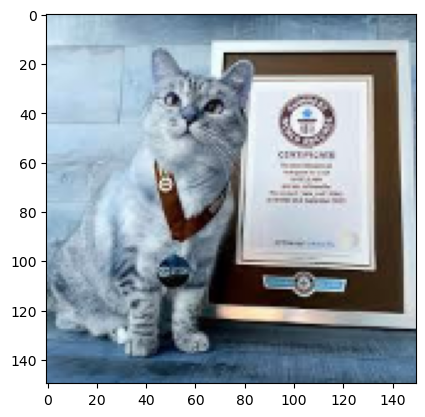

In [54]:
plt.imshow(P)

In [44]:
P

array([[[0.76862745, 0.87058824, 0.93333333],
        [0.74509804, 0.84705882, 0.90980392],
        [0.71372549, 0.81568627, 0.87843137],
        ...,
        [0.34117647, 0.43529412, 0.50588235],
        [0.3372549 , 0.43137255, 0.50196078],
        [0.30980392, 0.40392157, 0.4745098 ]],

       [[0.74901961, 0.85098039, 0.91372549],
        [0.73333333, 0.83529412, 0.89803922],
        [0.72156863, 0.82352941, 0.88627451],
        ...,
        [0.35686275, 0.45098039, 0.52156863],
        [0.34117647, 0.43529412, 0.50588235],
        [0.31764706, 0.41176471, 0.48235294]],

       [[0.74117647, 0.84313725, 0.90588235],
        [0.73333333, 0.83529412, 0.89803922],
        [0.73333333, 0.83529412, 0.89803922],
        ...,
        [0.31372549, 0.40784314, 0.47843137],
        [0.34117647, 0.43529412, 0.50588235],
        [0.36078431, 0.45490196, 0.5254902 ]],

       ...,

       [[0.31764706, 0.47058824, 0.61960784],
        [0.30980392, 0.45882353, 0.60784314],
        [0.29411765, 0

In [56]:
prediction=model.predict(m)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.7418883]], dtype=float32)

In [58]:
prediction[0][0]

0.7418883

In [64]:
if prediction[0][0]<0.5:
    print("its a dog")
else:
    print("its a cat")

its a cat


In [66]:
ct[1]

'cats'

In [68]:
p1=r"C:\Users\vidya\Downloads\test"

In [80]:
ct2=['Dog','Cat']
Data2=[]
for i in ct:
   ## print(os.path.join(path,i))
    A=os.path.join(p1,i)
    for j in os.listdir(A):
        #print(j)
        #print(os.path.join(A,j))
        B=os.path.join(A,j)
        img=cv.imread(B)
        img1=cv.resize(img,(150,150))
        labels=ct.index(i)
        Data2.append([img1,labels])


In [84]:
import random
random.shuffle(Data2)

In [86]:
Data2[1]

[array([[[154, 161, 164],
         [158, 165, 168],
         [161, 167, 173],
         ...,
         [200, 202, 202],
         [201, 203, 203],
         [199, 201, 201]],
 
        [[153, 160, 163],
         [155, 162, 165],
         [159, 165, 171],
         ...,
         [201, 203, 203],
         [202, 204, 204],
         [200, 202, 202]],
 
        [[154, 161, 164],
         [156, 163, 166],
         [158, 164, 170],
         ...,
         [202, 204, 204],
         [203, 205, 205],
         [200, 202, 202]],
 
        ...,
 
        [[226, 226, 212],
         [226, 226, 212],
         [227, 227, 212],
         ...,
         [171, 169, 158],
         [172, 169, 159],
         [172, 169, 159]],
 
        [[227, 227, 213],
         [227, 227, 213],
         [226, 226, 212],
         ...,
         [195, 193, 182],
         [185, 183, 172],
         [178, 176, 165]],
 
        [[225, 225, 211],
         [225, 225, 211],
         [224, 224, 210],
         ...,
         [204, 202, 191],
  

In [92]:
F1=[]
T1=[]
for i,j in Data2:
    F1.append(i)
    T1.append(j)

In [94]:
T1

[1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1]

In [96]:
F1=np.array(F1)
F1=F1/255  # for minmax scaler
T1=np.array(T1)

In [98]:
T1

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1])

In [108]:
pred2=model.predict(F)
pred2

18/18 ━━━━━━━━━━━━━━━━━━━━ 262s 14s/step


array([[9.98922646e-01],
       [2.66267499e-03],
       [2.52845380e-02],
       [9.98375833e-01],
       [9.91482794e-01],
       [9.96332109e-01],
       [2.41348241e-02],
       [9.44545269e-01],
       [9.60536122e-01],
       [1.26970187e-03],
       [1.60577968e-02],
       [1.14284866e-02],
       [8.33103135e-02],
       [3.39336577e-03],
       [1.80249624e-02],
       [9.93109643e-01],
       [2.32015848e-01],
       [9.65797544e-01],
       [9.70284462e-01],
       [9.97818291e-01],
       [7.84466229e-03],
       [9.92708266e-01],
       [8.79028559e-01],
       [2.17889041e-01],
       [2.45946605e-04],
       [9.81175959e-01],
       [9.59954500e-01],
       [9.88871038e-01],
       [9.33913350e-01],
       [9.99439478e-01],
       [1.20122340e-02],
       [6.50483323e-03],
       [5.40579438e-01],
       [2.77653150e-03],
       [2.24048033e-01],
       [9.96155798e-01],
       [8.29380064e-04],
       [4.31809351e-02],
       [7.85609335e-02],
       [5.86469918e-02],


In [112]:
Final=[]
for i in pred2:
    if i<0.5:
        Final.append(0)
    
    else:
        Final.append(1)

In [114]:
Final

[1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


In [148]:
T

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [146]:
confusion_matrix(T,Final)

array([[259,  19],
       [  3, 276]], dtype=int64)

In [129]:
print(classification_report(T,Final))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       278
           1       0.94      0.99      0.96       279

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557



In [133]:
accuracy_score(T,Final)*100

96.05026929982047